In [216]:
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [217]:
# application_record.csv		
# Feature name	Explanation	Remarks
# ID	Client number	
# CODE_GENDER	Gender	
# FLAG_OWN_CAR	Is there a car	
# FLAG_OWN_REALTY	Is there a property	
# CNT_CHILDREN	Number of children	
# AMT_INCOME_TOTAL	Annual income	
# NAME_INCOME_TYPE	Income category	
# NAME_EDUCATION_TYPE	Education level	
# NAME_FAMILY_STATUS	Marital status	
# NAME_HOUSING_TYPE	Way of living	
# DAYS_BIRTH	Birthday	Count backwards from current day (0), -1 means yesterday
# DAYS_EMPLOYED	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
# FLAG_MOBIL	Is there a mobile phone	
# FLAG_WORK_PHONE	Is there a work phone	
# FLAG_PHONE	Is there a phone	
# FLAG_EMAIL	Is there an email	
# OCCUPATION_TYPE	Occupation	
# CNT_FAM_MEMBERS	Family size	

# credit_record.csv		
# Feature name	Explanation	Remarks
# ID	Client number	
# MONTHS_BALANCE	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
# STATUS	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [218]:
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [219]:
application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [220]:
#replace '/' in value cells with '_'
application = application.replace(r'\/.*', '', regex=True) #this effect education type (grouped class of secondrary)
application['NAME_INCOME_TYPE'] = application['NAME_INCOME_TYPE'].replace('Commercial associate', 'Comm associate', regex=True)
application['NAME_HOUSING_TYPE'] = application['NAME_HOUSING_TYPE'].replace('Rented apartment', 'Rented apt', regex=True)

application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apt,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apt,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Comm associate,Secondary,Single,House,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Comm associate,Secondary,Single,House,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Comm associate,Secondary,Single,House,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Comm associate,Secondary,Single,House,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House,-22464,365243,1,0,0,0,NaN,1.0


In [221]:
credit.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [222]:
print("app data shape: ", application.shape)
print("credit data shape:", credit.shape)

app data shape:  (438557, 18)
credit data shape: (1048575, 3)


In [223]:
#count null value
application.isnull().sum()

#the only column with null value is "OCCUPATION_TYPE" with 30% null value
#let not drop this column at this point, this might help making deision in decision tree program.

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [224]:
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [253]:
#Getting basic info from application dataset
#miltiple plots

##GENDER
#count the number of unique value
print('Unique values of gender: ', application['CODE_GENDER'].unique())
genders = application['CODE_GENDER'].value_counts()
print('Gender count: ', genders)

own_cars = application['FLAG_OWN_CAR'].value_counts()
print('own cars: ', own_cars)

own_realty = application['FLAG_OWN_REALTY'].value_counts()
print('Own realty: ', own_realty)

income_type = application['NAME_INCOME_TYPE'].value_counts()
print('Income type:', income_type)

marital_status = application['NAME_FAMILY_STATUS'].value_counts()
print('Marital Status:', marital_status)

edu_level = application['NAME_EDUCATION_TYPE'].value_counts()
print('Education of applicants:', edu_level)

housing_type = application['NAME_HOUSING_TYPE'].value_counts()
print('Housing types:', housing_type)

credit_status = credit['STATUS'].value_counts()

Unique values of gender:  ['M' 'F' nan]
Gender count:  CODE_GENDER
F    230753
M    132475
Name: count, dtype: int64
own cars:  FLAG_OWN_CAR
N    214871
Y    148357
Name: count, dtype: int64
Own realty:  FLAG_OWN_REALTY
Y    246915
N    116313
Name: count, dtype: int64
Income type: NAME_INCOME_TYPE
Working           226104
Comm associate    100757
State servant      36186
Pensioner            164
Student               17
Name: count, dtype: int64
Marital Status: NAME_FAMILY_STATUS
Married           252333
Single             47918
Civil marriage     32075
Separated          22427
Widow               8475
Name: count, dtype: int64
Education of applicants: NAME_EDUCATION_TYPE
Secondary            241432
Higher education     104876
Incomplete higher     14171
Lower secondary        2463
Academic degree         286
Name: count, dtype: int64
Housing types: NAME_HOUSING_TYPE
House                  322120
With parents            18851
Municipal apartment     11553
Rented apt               5688

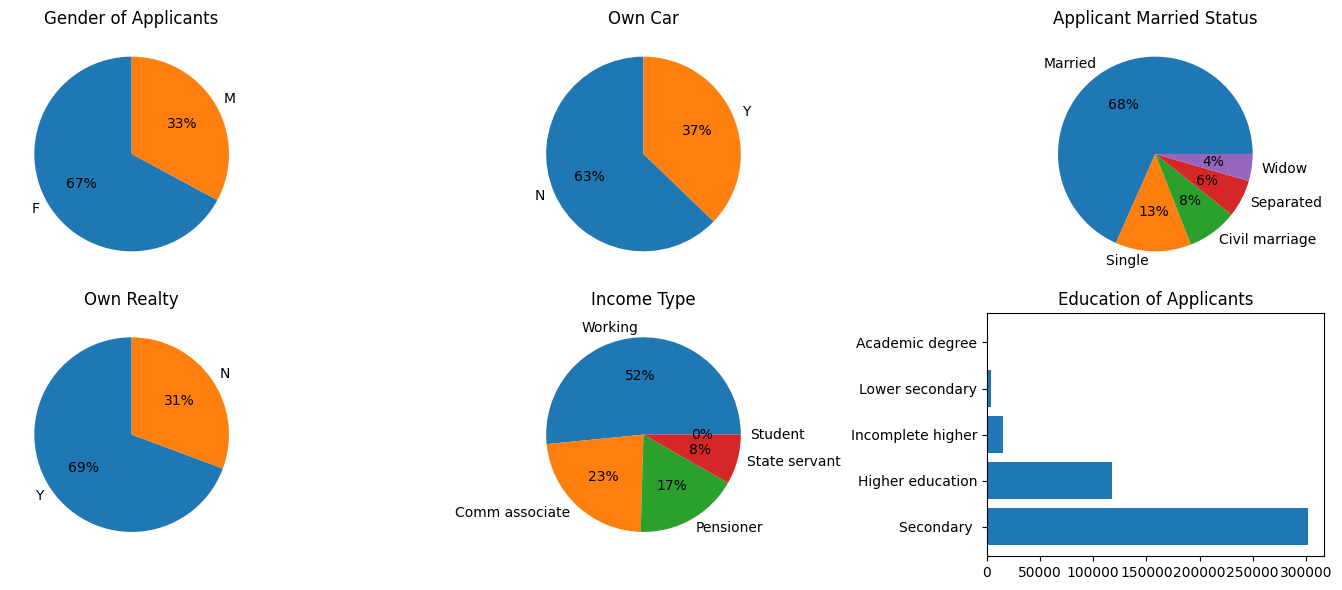

In [226]:
#plots
#create 2x2 grid

gs = GridSpec(2, 3)
fig = plt.figure(figsize=(14, 6))

#first subplot - GENDER
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(genders, labels=genders.index, autopct='%1.lf%%', startangle=90)
ax1.set_title('Gender of Applicants')


#second subplot - own cars
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(own_cars, labels=own_cars.index, autopct='%1.lf%%', startangle=90)
ax2.set_title('Own Car')

#third subplot - own realty
ax3 = fig.add_subplot(gs[1,0])
ax3.pie(own_realty, labels=own_realty.index, autopct='%1.lf%%', startangle=90)
ax3.set_title('Own Realty')

#forth subplot - income type
ax4 = fig.add_subplot(gs[1, 1])
ax4.pie(income_type, labels=income_type.index, autopct='%1.lf%%')
ax4.set_title('Income Type')

ax5 = fig.add_subplot(gs[0, 2])
ax5.pie(marital_status, labels=marital_status.index, autopct='%1.lf%%')
ax5.set_title('Applicant Married Status')

ax6 = fig.add_subplot(gs[1, 2])
ax6.barh(edu_level.index, edu_level.values)
ax6.set_title('Education of Applicants')

plt.tight_layout()
plt.show()

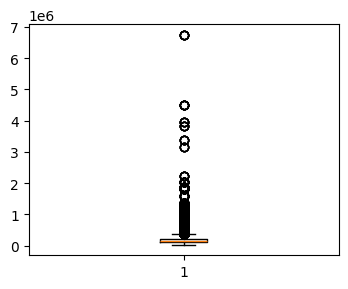

In [227]:
#income plot
plt.figure(figsize=(4,3))
plt.boxplot(application['AMT_INCOME_TOTAL'])
plt.show()

<Axes: >

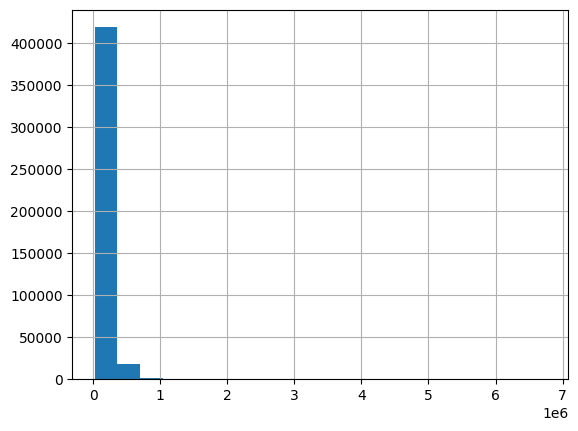

In [228]:
application['AMT_INCOME_TOTAL'].hist(bins=20)

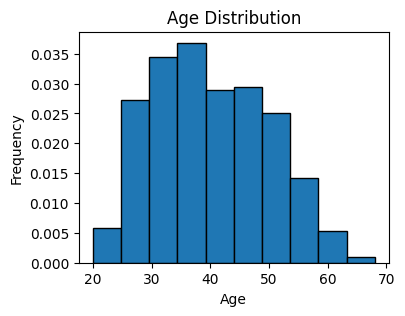

In [245]:
#calculate age
application['AGE'] = -(application['DAYS_BIRTH'])//365

#chart for age distribtion
plt.figure(figsize=(4, 3))
plt.hist(application['AGE'], bins=10, edgecolor='black', density=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

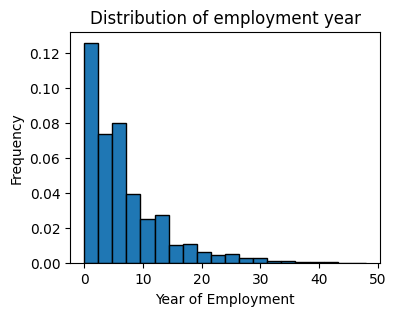

In [244]:
#days of employee
application['EMPLOYMENT_YEAR'] = -(application['DAYS_EMPLOYED'])//365

#there are noise in the data, day employed is positive. Replace those with na
application[application['EMPLOYMENT_YEAR'] < 0] = np.nan

plt.figure(figsize=(4, 3))
plt.hist(application['EMPLOYMENT_YEAR'], bins=20, edgecolor='black', density=True)
plt.xlabel('Year of Employment')
plt.ylabel('Frequency')
plt.title('Distribution of employment year')
plt.show()

Text(0.5, 1.0, 'Number of Each Housing Type')

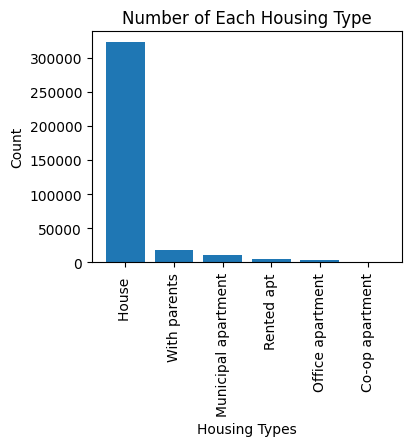

In [249]:
#housing type
plt.figure(figsize=(4,3))
plt.bar(housing_type.index, housing_type.values)
plt.xticks(rotation='vertical') #rotating x-axis labels verticaly
plt.xlabel('Housing Types')
plt.ylabel('Count')
plt.title('Number of Each Housing Type')

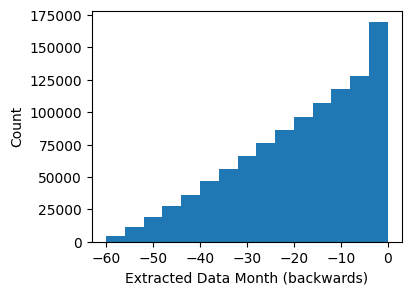

In [252]:
#credit terms
plt.figure(figsize=(4,3))
plt.hist(credit['MONTHS_BALANCE'], bins=15)
plt.xlabel('Extracted Data Month (backwards)')
plt.ylabel('Count')
plt.show()

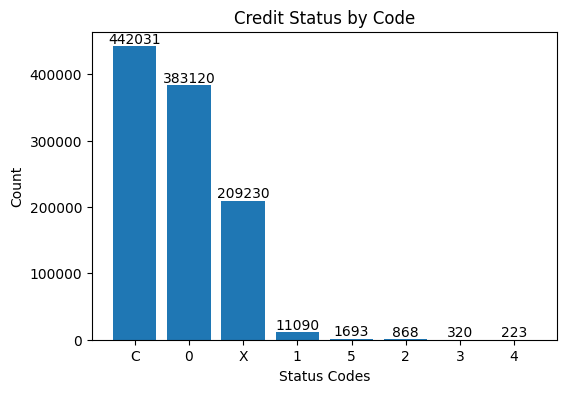

In [264]:
plt.figure(figsize=(6,4))
bars = plt.bar(credit_status.index, credit_status.values)
plt.xlabel('Status Codes')
plt.ylabel('Count')
plt.title('Credit Status by Code')

#put count on each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()